<h1 style="color:darkbluegrayslate; font-weight:bold"> Weather forecasting project </h1>
<p> weather forcasting is the prediction of what the atmosphere will be like in a particular place. It is the way of predicting things like cloud cover, rain,and snow. and In this project we are going to predict where it is going to rain tomorrow or not in australia by using machine learning algorithms. let's start the project. </p>
<em style="color:blue;">the dataset contain daily weather condition of australia and downloaded from kaggle.com platform. </em>

<p> let's us import the neccessary libraries</p> 
<blockquote style="color:green">
    pandas is data alaysis and manipulation tools 
    we use pandas to read comma-separated file,manipulate and get information about the dataset
</blockquote>

In [3]:
 import pandas as pd

<h2 style="color:orange"> Load the dataset into pandas DataFrame <h2>

In [4]:
data = pd.read_csv('AUSWeather.csv')
weather_data = data.copy() 

<h2>let us get to know to the dataset </h2>

 <h3 style="color:orange">1) Dataset dimension </h3>

In [5]:
weather_data.shape

(7861, 24)

<h3 style="color:orange">2)  Dataset top 5 rows </h3>

In [6]:
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Weather
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,Fog
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,Fog
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,"Freezing Drizzle,Fog"
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,"Freezing Drizzle,Fog"
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,Fog


<h3 style="color:orange">3)  More information about the dataset </h3>

In [7]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7861 non-null   object 
 1   Location       7861 non-null   object 
 2   MinTemp        7814 non-null   float64
 3   MaxTemp        7821 non-null   float64
 4   Rainfall       7745 non-null   float64
 5   Evaporation    1750 non-null   float64
 6   Sunshine       550 non-null    float64
 7   WindGustDir    7731 non-null   object 
 8   WindGustSpeed  7731 non-null   float64
 9   WindDir9am     6891 non-null   object 
 10  WindDir3pm     7727 non-null   object 
 11  WindSpeed9am   7798 non-null   float64
 12  WindSpeed3pm   7800 non-null   float64
 13  Humidity9am    7794 non-null   float64
 14  Humidity3pm    7796 non-null   float64
 15  Pressure9am    7680 non-null   float64
 16  Pressure3pm    7675 non-null   float64
 17  Cloud9am       3041 non-null   float64
 18  Cloud3pm

<h3 style="color:orange"> 4)  List of all the datatypes and their columns  </h3>

In [100]:
weather_data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
Weather           object
dtype: object

In [101]:
weather_data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Weather'],
      dtype='object')

<h1 style="font-weight:bold"> Data preprocessing task </h1>

<h2> task 1: cleaning the dataset </h2>
<p> some machine learning algorithms turn out to be errors if there is missing values in the dataset. so handling missing vaue in very crucial
steps before we apply algorithms in the dataset. 
<em> we can handle missing values in three different ways: </em>
<ul> 
    <li> Interpolation: estimating missing values based on existing data points </li>
    <li> Dropping missing values: </li>
    <li> Imputation: use mean, mode, and median in order to fill the missing values </li>
  In this project, we use intepolation and impulation. 
</ul>

<h3 style="color:orange"> 1) identify missing values </h3>

In [102]:
weather_data.isnull().sum()

Date                0
Location            0
MinTemp            47
MaxTemp            40
Rainfall          116
Evaporation      6111
Sunshine         7311
WindGustDir       130
WindGustSpeed     130
WindDir9am        970
WindDir3pm        134
WindSpeed9am       63
WindSpeed3pm       61
Humidity9am        67
Humidity3pm        65
Pressure9am       181
Pressure3pm       186
Cloud9am         4820
Cloud3pm         4680
Temp9am            53
Temp3pm            54
RainToday         116
RainTomorrow      116
Weather             0
dtype: int64

<h3 style="color:orange"> 2) handle missing values </h3>

In [8]:
weather_data = weather_data.interpolate()

C:\Users\GBU\AppData\Local\Temp\ipykernel_10164\634569999.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  weather_data = weather_data.interpolate()


<h3 style="color:orange"> 3) verify if there are missing values </h3>

In [106]:
weather_data.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation      6049
Sunshine         6049
WindGustDir       130
WindGustSpeed       0
WindDir9am        970
WindDir3pm        134
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            2
Temp9am             0
Temp3pm             0
RainToday         116
RainTomorrow      116
Weather             0
dtype: int64

<blockquote style="color:blue">
    as we observe from above, there is still missing values in columns that have object data type.
    so, we can handle these with imputation 
</blockquote>

In [9]:
missing_category_feature = weather_data.select_dtypes(include='object').isnull().sum() 
for key in missing_category_feature.index: 
     weather_data[key].fillna(weather_data[key].mode()[0], inplace=True) 

<h3 style="color:orange"> 4) verify if there are missing values </h3>

In [110]:
weather_data.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation      6049
Sunshine         6049
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            2
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
Weather             0
dtype: int64

<blockquote style="color:blue">
    as we observe from above, there is still missing values in some columns such as sunshine,Evaporation, and cloud3pm.
    so, we can handle these with imputation again 
</blockquote>

In [10]:
weather_data['Sunshine'].fillna(weather_data['Sunshine'].mode()[0],inplace=True) 
weather_data['Evaporation'].fillna(weather_data['Evaporation'].mode()[0], inplace=True) 
weather_data['Cloud3pm'].fillna(weather_data['Cloud3pm'].mode()[0], inplace=True)

<h3 style="color:orange"> 5) verify if there are missing values again </h3>

In [11]:
weather_data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Weather          0
dtype: int64

<h2 style="color:green"> Now, The dataset is cleaned </h2> 

<h1> Task 2: Remove duplicates </h1> 

In [12]:
unique_weather_data = weather_data.drop_duplicates()

<h1> Task 3: handling outliers  </h1> 
<blockquote style="color:orange"> outlier is a data object that deviates significantly from the rest of the data objects and behaves in a different manner. they can their way into a dataset naturally through variability, or they can be the result of issues like human error, faulty equipment, or poor sampling. Regardless of how they get into the data, outliers can have a big impact on statistical analysis and machine learning because they impact calculations like mean and standard deviation, and they can skew hypothesis tests

</blockquote> 

<h3> 1) Identify outliers </h3>

In [13]:
unique_weather_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,10.962651,23.916474,1.847933,3.310050,4.244975,34.103231,9.516347,14.325277,70.747424,45.987343,1018.226460,1015.582712,4.762880,5.330810,16.067046,22.523197
std,6.193246,7.255932,6.377073,3.453797,1.574157,12.634145,7.038859,7.130776,20.137527,20.582419,6.942729,6.807965,2.433305,2.375726,6.119531,7.028660
min,-3.000000,6.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,6.000000,1.000000,989.800000,982.900000,0.000000,0.000000,0.300000,6.400000
25%,6.000000,18.100000,0.000000,2.200000,3.900000,26.000000,4.000000,9.000000,57.000000,31.000000,1013.500000,1010.800000,2.901993,4.000000,11.300000,16.900000
50%,10.700000,23.400000,0.000000,2.200000,3.900000,33.000000,7.500000,13.000000,73.000000,45.000000,1018.200000,1015.600000,5.000000,6.000000,16.100000,21.900000
75%,15.950000,29.200000,0.200000,2.200000,3.900000,41.000000,13.000000,19.000000,86.000000,58.000000,1022.900000,1020.100000,7.000000,7.118937,20.500000,27.600000
max,29.400000,46.400000,116.000000,64.800000,13.700000,107.000000,48.000000,56.000000,100.000000,100.000000,1039.900000,1036.800000,8.000000,8.000000,37.700000,44.800000


<blockquote style="color:orange">we can see that there is outlier in columns Rainfall,Evaportation. because there is a huge gap between mean value and max value.
</blockquote/> 

<Axes: >

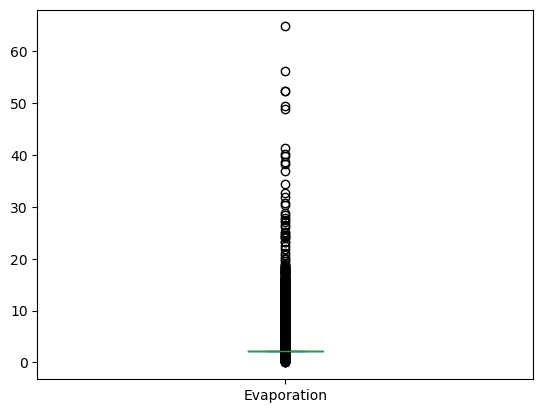

In [122]:
# the visualize Evaporation to see the autlier 
unique_weather_data['Evaporation'].plot(kind='box')

<Axes: >

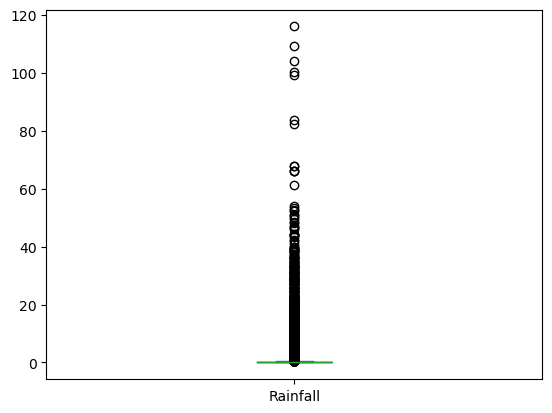

In [121]:
# # the visualize Rainfall to see the autlier 
unique_weather_data['Rainfall'].plot(kind='box')

<Axes: ylabel='Frequency'>

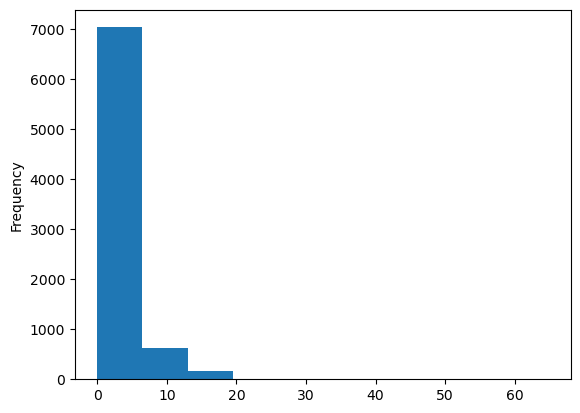

In [123]:
# the visualize Evaporation distribution
unique_weather_data['Evaporation'].plot(kind='hist')

<Axes: ylabel='Frequency'>

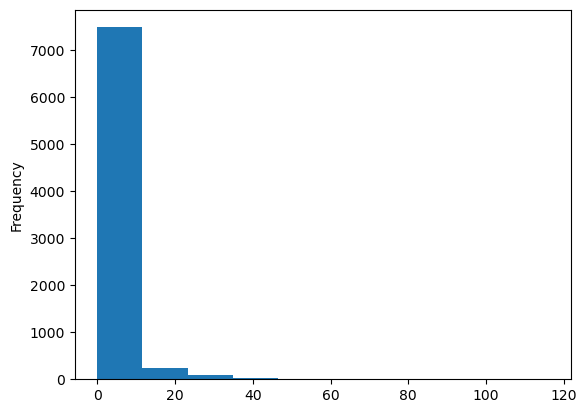

In [124]:
# the visualize the Rainfall distribution
unique_weather_data['Rainfall'].plot(kind='hist')

<h1 style=""> Task 4: check correlation among the features  </h1>
<blockquote style="color:orange"> It measures the extent to which two variables are linearly related 
   <ul>
      <li> 1 = there is a perfect linear relationship between the variables  </li>
      <li> 0 = there is no linear relationship between the variables </li>
      <li> -1 = there is a perfect negative linear relationship between the variables </li> 
   </ul> 
</blockquote>

In [14]:
cols = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
cor_matrix = unique_weather_data[cols].corr()
cor_matrix

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.780319,0.119797,0.358540,0.126289,0.333418,0.273530,0.153117,-0.357917,-0.163036,-0.511143,-0.502367,-0.133215,-0.029600,0.916212,0.747779
MaxTemp,0.780319,1.000000,-0.100955,0.352988,0.150183,0.266097,0.070700,0.094485,-0.533583,-0.582929,-0.381287,-0.451978,-0.255296,-0.176476,0.906141,0.984392
Rainfall,0.119797,-0.100955,1.000000,-0.071994,-0.062101,0.111497,0.109842,0.064442,0.232048,0.291887,-0.190811,-0.138701,0.120149,0.116968,0.002311,-0.106029
Evaporation,0.358540,0.352988,-0.071994,1.000000,0.290465,0.176824,0.312348,0.054798,-0.483207,-0.354868,-0.160678,-0.165765,-0.287236,-0.256174,0.373499,0.347361
Sunshine,0.126289,0.150183,-0.062101,0.290465,1.000000,0.027319,0.122298,-0.038188,-0.268447,-0.244036,-0.009334,-0.014128,-0.304644,-0.285589,0.146276,0.160157
WindGustSpeed,0.333418,0.266097,0.111497,0.176824,0.027319,1.000000,0.470839,0.667452,-0.343601,-0.191047,-0.556268,-0.532175,-0.018310,0.016584,0.347180,0.224691
WindSpeed9am,0.273530,0.070700,0.109842,0.312348,0.122298,0.470839,1.000000,0.368260,-0.436609,-0.141234,-0.272327,-0.202926,-0.110857,-0.085120,0.228360,0.050943
WindSpeed3pm,0.153117,0.094485,0.064442,0.054798,-0.038188,0.667452,0.368260,1.000000,-0.229176,-0.159489,-0.428246,-0.388317,0.031501,0.014382,0.166538,0.071270
Humidity9am,-0.357917,-0.533583,0.232048,-0.483207,-0.268447,-0.343601,-0.436609,-0.229176,1.000000,0.724430,0.235969,0.247926,0.357620,0.346838,-0.555742,-0.527533
Humidity3pm,-0.163036,-0.582929,0.291887,-0.354868,-0.244036,-0.191047,-0.141234,-0.159489,0.724430,1.000000,0.094314,0.156023,0.347019,0.418069,-0.382066,-0.632528


In [ ]:
<h2> draw heatmap graph to depict the correlation </h2> 

<Axes: >

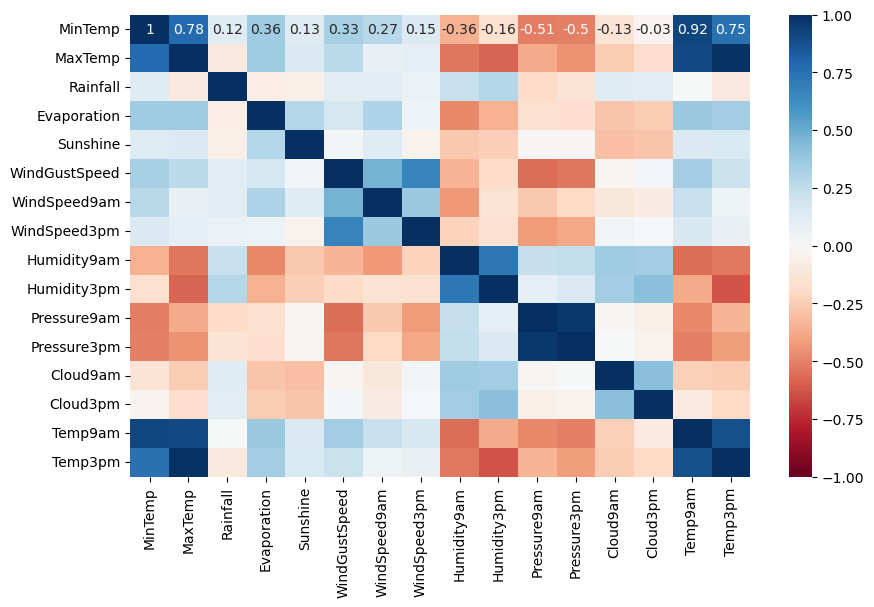

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline 
plt.figure(figsize=(10,6))
sns.heatmap(cor_matrix, annot=True, cmap='RdBu',vmin=-1, vmax=1) 

<blockquote style="color:orange"> As we see from the above graph, The Red color indicate, Negative linear relationship and and the blue color indicate positive linear relationship
 for example, there is linear relationship between MinTemp and Temp3pm. i.e when Mintemp increase, then temp3pm also increase.
</blockquote> 

<h1> Task 5: Feature selection/ Extraction </h1>

In [16]:
# the weather categorical column is not in the standard, so let's change it into standard category 

from itertools import chain
def create_list(x):
    list_of_lists = [w.split() for w in x.split(",")]
    flat_list = list(chain(*list_of_lists))
    return flat_list

def get_weather(list1):

    if 'Fog' in list1 and 'Rain' in list1:
        return 'RAIN+FOG'
    elif 'Snow' in list1 and 'Rain' in list1:
        return 'SNOW+RAIN'
    elif 'Snow' in list1:
        return 'SNOW'
    elif 'Rain' in list1:
        return 'RAIN'
    elif 'Fog' in list1:
        return 'FOG'
    elif 'Clear' in list1:
        return 'Clear'
    elif 'Cloudy' in list1:
        return 'Cloudy'
    else:
        return 'RAIN' 

# convert the weather categories into standard categories
x = 'Thunderstorms,Moderate Rain Showers,Fog'   #
unique_weather_data['standard_weather'] = unique_weather_data['Weather'].apply(lambda x: get_weather(create_list(x)))
unique_weather_data    # the weather column is more standard 
# let's remove weather column since it is not relevant now, or we have already standard weather columns
unique_weather_data.drop(columns=['Weather','Date'],axis=1, inplace=True)

In [131]:
unique_weather_data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,standard_weather
0,Albury,13.4,22.9,0.6,2.2,3.9,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.00,8.0,16.9,21.8,No,No,FOG
1,Albury,7.4,25.1,0.0,2.2,3.9,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,7.75,8.0,17.2,24.3,No,No,FOG
2,Albury,12.9,25.7,0.0,2.2,3.9,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,7.50,2.0,21.0,23.2,No,No,FOG
3,Albury,9.2,28.0,0.0,2.2,3.9,NE,24.0,SE,E,...,16.0,1017.6,1012.8,7.25,5.0,18.1,26.5,No,No,FOG
4,Albury,17.5,32.3,1.0,2.2,3.9,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.00,8.0,17.8,29.7,No,No,FOG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7856,Cobar,18.9,32.2,0.0,7.2,3.9,S,43.0,ESE,WSW,...,32.0,1017.5,1014.9,3.00,5.0,25.2,31.2,No,No,Cloudy
7857,Cobar,18.5,32.2,0.0,6.8,3.9,WSW,30.0,SE,WSW,...,32.0,1016.6,1013.6,1.00,5.0,22.6,31.2,No,No,Cloudy
7858,Cobar,16.6,32.1,0.0,8.6,3.9,NNW,31.0,SW,NW,...,28.0,1014.6,1012.0,3.00,4.0,19.6,30.4,No,No,Cloudy
7859,Cobar,19.6,29.0,0.0,7.6,3.9,NNW,46.0,N,NNW,...,39.0,1010.8,1008.1,7.00,8.0,21.4,27.6,No,No,Cloudy


<h1>  Task 6: Feature Encoding </h1>
<blockquote style="color:orange">
Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. 
It is an important pre-processing step in a machine-learning project
</blockquote>

from sklearn.preprocessing import LabelEncoder 

weather_label_encoder = LabelEncoder()
unique_weather_data['standard_weather'] = weather_label_encoder.fit_transform(unique_weather_data['standard_weather'])

location_label_encoder = LabelEncoder() 
unique_weather_data['Location'] = location_label_encoder.fit_transform(unique_weather_data['Location'])

winddir9label_encoder = LabelEncoder()
unique_weather_data['WindDir9am'] = winddir9label_encoder.fit_transform(unique_weather_data['WindDir9am']) 

winddir3label_encoder = LabelEncoder()
unique_weather_data['WindDir3pm'] = winddir3label_encoder.fit_transform(unique_weather_data['WindDir3pm'])

winddirlabel_encoder = LabelEncoder() 
unique_weather_data['WindGustDir'] = winddirlabel_encoder.fit_transform(unique_weather_data['WindGustDir']) 

raintoday_encoder = LabelEncoder()
unique_weather_data['RainToday'] = raintoday_encoder.fit_transform(unique_weather_data['RainToday'])

raintomorrow_encoder = LabelEncoder() 
unique_weather_data['RainTomorrow'] = winddirlabel_encoder.fit_transform(unique_weather_data['RainTomorrow']) 


<h1> Task 7: Feature scalling  </h1>
<blockquote style="color:orange">
Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.
Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, many classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.
Scale numerical features: Normalize or standardize numerical features to ensure that they have a similar scale. This can help improve the performance of some machine learning algorithms, particularly SVM.
before scalling let's select columns that we need to scale or normalize
</blockquote>

<h3 style="color:orange"> select dependent and independent variables  </h3> 
<p>
the independent variables (features) are the factors that influence or affect the dependent variable (target), which, in this case, is likely to be whether it will rain tomorrow ('RainTomorrow')
you would use the independent variables (features) to predict whether it will rain tomorrow ('RainTomorrow'), making 'RainTomorrow' the dependent 
</p> 

In [19]:
x = unique_weather_data.drop(['RainTomorrow'], axis=1) # all columns are independent variable except "standard_weather"
y = unique_weather_data['RainTomorrow']  # this is the variable that is dependent and we are going to forcast

<h3 style="color:orange"> Apply scalling to independent variable </h3> 

In [20]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler() 
x_std = std_scaler.fit_transform(x)    # normalize independent variables
x_std

array([[-1.09589834,  0.39357453, -0.14009756, ..., -0.1028991 ,
        -0.4715511 ,  0.80045128],
       [-1.09589834, -0.57528436,  0.16312192, ...,  0.25281009,
        -0.4715511 ,  0.80045128],
       [-1.09589834,  0.31283629,  0.24581814, ...,  0.09629805,
        -0.4715511 ,  0.80045128],
       ...,
       [ 1.50167647,  0.91029927,  1.12791118, ...,  1.12074049,
        -0.4715511 ,  0.00985604],
       [ 1.50167647,  1.39472871,  0.70064737, ...,  0.72234621,
        -0.4715511 ,  0.00985604],
       [ 1.50167647,  1.20095693,  0.24581814, ...,  0.36663702,
        -0.4715511 ,  0.00985604]])

<h1> Task 8: Apply machine learning algorithm </h1> 

<h3 style="color:orange"> 1) Spliting the dataset </h3> 
<p> let's split the dataset and 80% for training and 20% for testing </p>

In [22]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train,y_test = train_test_split(x_std,y,test_size=0.2,random_state=0) # 80% for training and 20% for testing 

<h3 style="color:orange"> 2) Building models  </h3> 
<p> let us split the dataset and 80% for training and 20% for testing </p>

In [23]:
from sklearn.tree import DecisionTreeClassifier 
decision_tree_model = DecisionTreeClassifier()   # create decision tree classifier object 

<h3 style="color:orange"> 2) training decision tree classifier model   </h3> 

In [24]:
decision_tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

<h3 style="color:orange"> 2) model prediction  </h3> 

In [25]:
# model prediction; predict the response for the test dataset 
y_pred_dt = decision_tree_model.predict(x_test) 
y_pred_dt

array([0, 0, 0, ..., 0, 0, 0])

<h3 style="color:orange"> 2) model Evaluation, classification report, and confusion matrix  </h3> 

In [26]:
# model evaluations
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# check accuracy; how  often is the classifier correct? 
accuracy_score(y_test, y_pred_dt)

0.8270820089001907

In [147]:
# classification report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1297
           1       0.53      0.50      0.52       276

    accuracy                           0.84      1573
   macro avg       0.71      0.70      0.71      1573
weighted avg       0.83      0.84      0.83      1573



<Axes: >

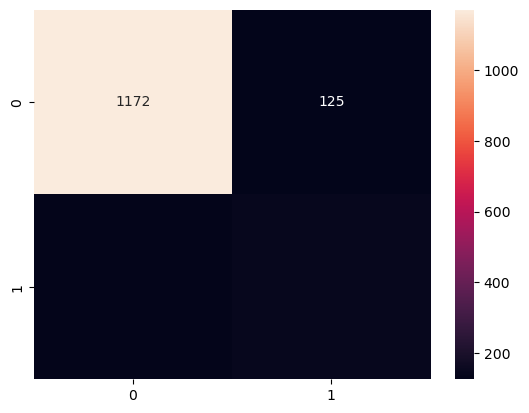

In [77]:
cm = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm,annot = True, fmt='d')

<h1 style="color:orange"> Building multiple models: best models  </h1>

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC

dt_model = DecisionTreeClassifier() 
rf_model = RandomForestClassifier()
svc_model =  SVC(kernel='linear') 

model_list = [dt_model, rf_model,svc_model]

acc_list = [] 
feature_importances = [] 

for model in model_list:
    model.fit(x_train,y_train) 
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_list.append(acc)
    if model is svc_model:
        feature_importance = model.coef_[0] 
    else:
        feature_importance = model.feature_importances_
       
    feature_importances.append(feature_importance)


ValueError: sort array is read-only

In [40]:
# <h1> Feature importance </h1>
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Weather
0,12/1/2008,Albury,13.4,22.9,0.6,2.2,3.9,W,44.0,W,...,22.0,1007.7,1007.1,8.00,8.0,16.9,21.8,No,No,Fog
1,12/2/2008,Albury,7.4,25.1,0.0,2.2,3.9,WNW,44.0,NNW,...,25.0,1010.6,1007.8,7.75,8.0,17.2,24.3,No,No,Fog
2,12/3/2008,Albury,12.9,25.7,0.0,2.2,3.9,WSW,46.0,W,...,30.0,1007.6,1008.7,7.50,2.0,21.0,23.2,No,No,"Freezing Drizzle,Fog"
3,12/4/2008,Albury,9.2,28.0,0.0,2.2,3.9,NE,24.0,SE,...,16.0,1017.6,1012.8,7.25,5.0,18.1,26.5,No,No,"Freezing Drizzle,Fog"
4,12/5/2008,Albury,17.5,32.3,1.0,2.2,3.9,W,41.0,ENE,...,33.0,1010.8,1006.0,7.00,8.0,17.8,29.7,No,No,Fog


<h1> Visualize feature importance of Random Forest model  </h1> 

C:\Users\GBU\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


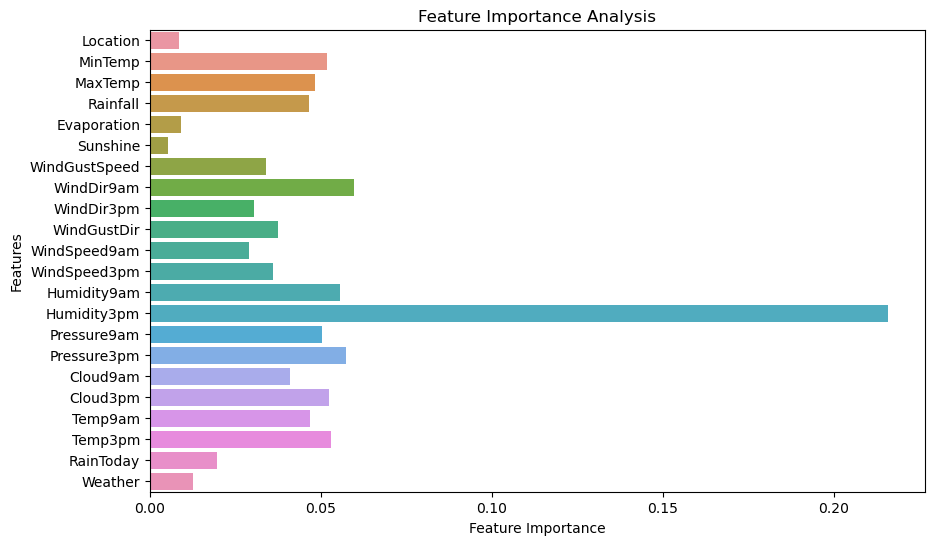

In [77]:
feature_names = ['Location','MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed','WindDir9am','WindDir3pm','WindGustDir', 'WindSpeed9am','WindSpeed3pm','Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday','Weather']
len(feature_names)
# Plot feature importance

plt.figure(figsize=(10, 6))
sns.barplot(x=rf_feature_importance,y=feature_names, orient='h')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.show()

<h1> Visualize feature importance of Decistion Tree model </h1> 

C:\Users\GBU\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


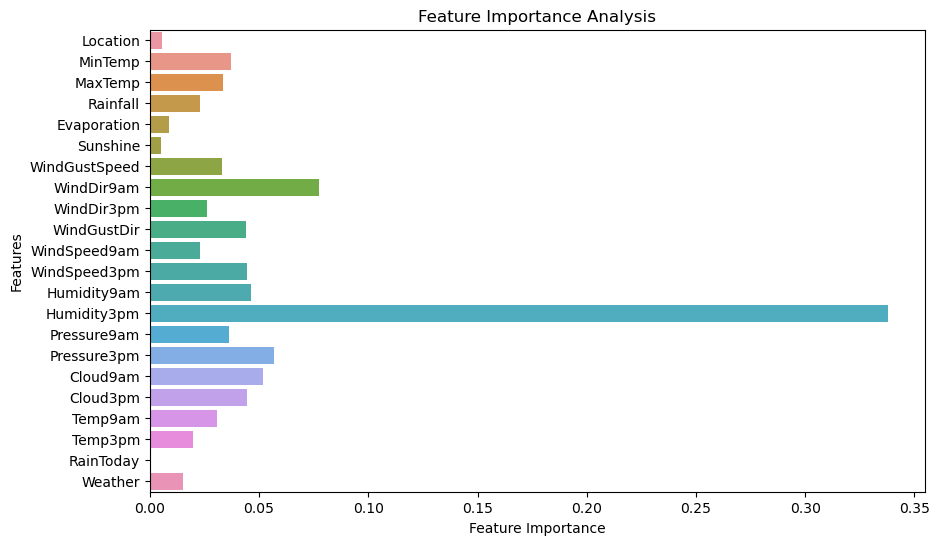

In [78]:
# Plot feature importance

plt.figure(figsize=(10, 6))
sns.barplot(x=dt_feature_importance,y=feature_names, orient='h')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.show()

<h1> Visualize feature importance of SVM model </h1> 

C:\Users\GBU\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


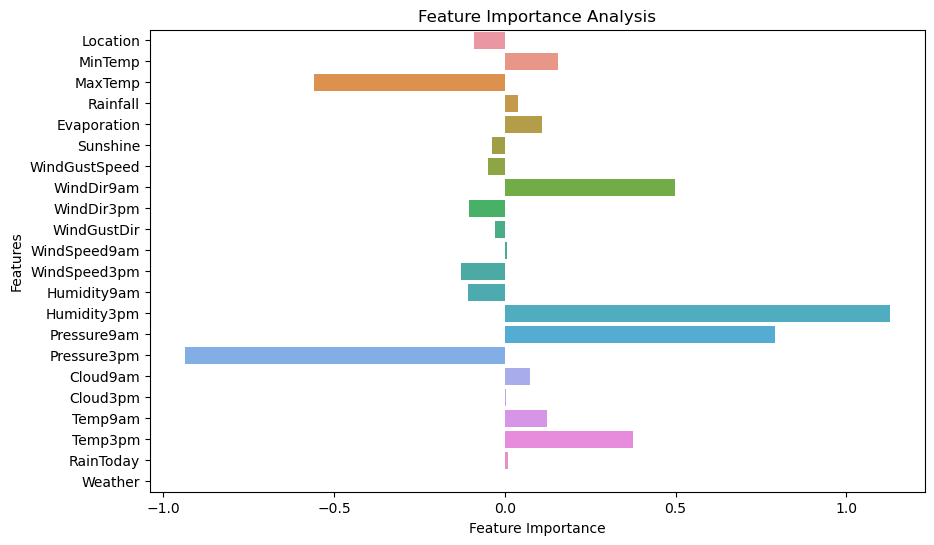

In [79]:
# Plot feature importance

plt.figure(figsize=(10, 6))
sns.barplot(x=svm_feature_importance,y=feature_names, orient='h')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.show()

In [97]:
model_df = pd.DataFrame({'Model':model_list,'Accuracy':acc_list})
model_df

,Model,Accuracy
0,DecisionTreeClassifier(),0.829625
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.891291
2,SVC(kernel='linear'),0.877940


<h1 style="color:blue"> Completed </h1>